In [1]:
import geopandas as gpd
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt

In [2]:
AcresTable = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv")
Ag2012 = []
Ag2017 = []
random.seed(0)
for row in AcresTable:
    if 'AcresHarv2012' in row:
        Ag2012.append(row)
    if 'AcresHarv2017' in row:
        Ag2017.append(row)

colnames = ['county','NumOperations2012','AcresHarv2012', 'NumOperations2017', 'AcresHarv2017']
#data = pd.read_csv('AcresTotalsCounty20122017.csv', names=colnames)

col_list2012 = ["county", "AcresHarv2012"]
colorado2012 = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", usecols=col_list2012)
col_list2017 = ["county", "AcresHarv2017"]
colorado2017 = pd.read_csv(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", usecols = col_list2017)

top2012 = []
top2017 = []
top5 = ['adams', 'kitcarson', 'yuma', 'weld', 'phillips']
for row in colorado2012.iterrows():
    if 'county' == top5:
        top2012.append(row)

In [3]:
datatable = {'county': [], 'AcresHarv2012': [], 'AcresHarv2017': []}
#df = pd.DataFrame(columns = ['county', 'AcresHarv2012', 'AcresHarv2017'])

from csv import DictReader
Names = ["yuma", "weld", "phillips", "kitcarson", "adams"]

with open(r"C:\Users\catan\Desktop\programming final\AcresTotalsCounty20122017.csv", newline='') as csvfile:
    reader = DictReader(csvfile)
    #rows = [row for row in reader if row['county'] in Names]
    
    for row in reader:
        if row['county'] in Names:
            county = row['county']
            AcresHarv2012 = int(row['AcresHarv2012'])
            AcresHarv2017 = int(row['AcresHarv2017'])
            
            datatable['county'].append(county)
            datatable['AcresHarv2012'].append(AcresHarv2012)
            datatable['AcresHarv2017'].append(AcresHarv2017)
    
HarvGdf = gpd.GeoDataFrame(datatable)
    

In [4]:
# precipitation join

cty2012prcp = pd.read_csv(r"C:\Users\catan\Desktop\programming final\cty2012prcp.csv")
cty2017prcp = pd.read_csv(r"C:\Users\catan\Desktop\programming final\cty2017prcp.csv")

prcp_join = cty2012prcp.merge(cty2017prcp, on='county')

In [5]:
# joining precipitation and harvest data

all_data = prcp_join.merge(HarvGdf, on='county')

In [44]:
# creating percent change columns

all_data['prcp_change'] = ((all_data['avg_prcp2017'] - all_data['avg_prcp2012']) / all_data['avg_prcp2012']) * 100
all_data['harv_change'] = ((all_data['AcresHarv2017'] - all_data['AcresHarv2012']) / all_data['AcresHarv2012']) * 100

In [ ]:
def perc_change (x,y):
    # this function calculates percent change between two variables

    

In [7]:
# exporting final table to csv

all_data.to_csv(r"C:\Users\catan\Desktop\programming final\final_proj.csv", index = False)

In [8]:
# concluding print statement

print("The county with the largest precipitation change is Yuma. The county with the largest acres harvest change is Kit Carson.")

The county with the largest precipitation change is Yuma. The county with the largest acres harvest change is Kit Carson.


   OBJECTID    COUNTY             FULL     LABEL CNTY_FIPS  NUM_FIPS  \
0        15     adams     Adams County     Adams       001         1   
1        17      yuma      Yuma County      Yuma       125       125   
2        32  phillips  Phillips County  Phillips       095        95   
3        52      weld      Weld County      Weld       123       123   

    CENT_LAT   CENT_LONG US_FIPS  \
0  39.873634 -104.337935   08001   
1  40.002899 -102.424226   08125   
2  40.593884 -102.357580   08095   
3  40.554840 -104.392525   08123   

                                            geometry    county  avg_prcp2012  \
0  POLYGON ((-104.58249 39.73964, -104.58362 39.7...     adams     10.733571   
1  POLYGON ((-102.80180 39.68163, -102.80179 39.6...      yuma     10.690000   
2  POLYGON ((-102.38226 40.74935, -102.38176 40.7...  phillips     11.196667   
3  MULTIPOLYGON (((-104.97668 40.03288, -104.9763...      weld      9.984000   

   avg_prcp2017  AcresHarv2012  AcresHarv2017  prcp_chang

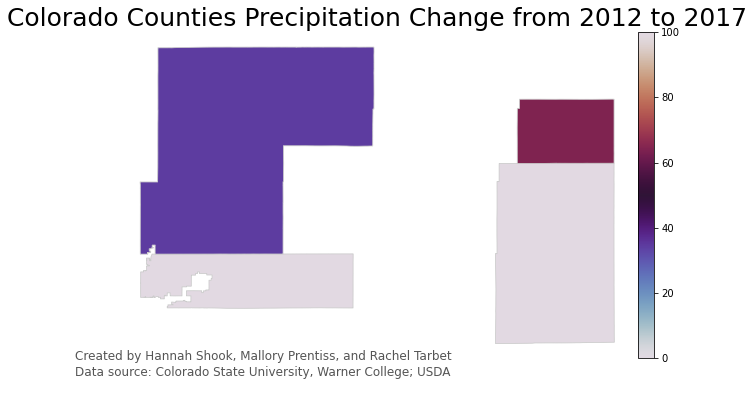

In [42]:
# map creation

fp = r"C:\Users\catan\Desktop\programming final\Colorado_County_Boundaries-shp\Colorado_County_Boundaries.shp"
map_df = gpd.read_file(fp)
map_df['COUNTY'] = map_df['COUNTY'].str.lower()
df = pd.read_csv(r"C:\Users\catan\Desktop\programming final\final_proj.csv", header=0)
merged = map_df.set_index('COUNTY').join(df.set_index('county'))
merged = map_df.merge(df, left_on='COUNTY', right_on='county')
variable = merged['prcp_change']
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, figsize = (10,6))
merged.plot(column = variable, cmap = 'twilight', linewidth = 0.8, ax = ax, edgecolor = '0.8')
print(merged)
ax.axis('off')
ax.set_title('Colorado Counties Precipitation Change from 2012 to 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Data source: Colorado State University, Warner College; USDA', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Created by Hannah Shook, Mallory Prentiss, and Rachel Tarbet', xy=(0.1, .12),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

sm = plt.cm.ScalarMappable(cmap='twilight', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,fraction=0.046, pad=0.0000001)

fig.savefig(r'C:\Users\catan\Desktop\programming final\map_export.png', dpi=300)

